Dataset shape: (41188, 20)
Accuracy: 84.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.31      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238

Confusion Matrix:
 [[6612  698]
 [ 618  310]]


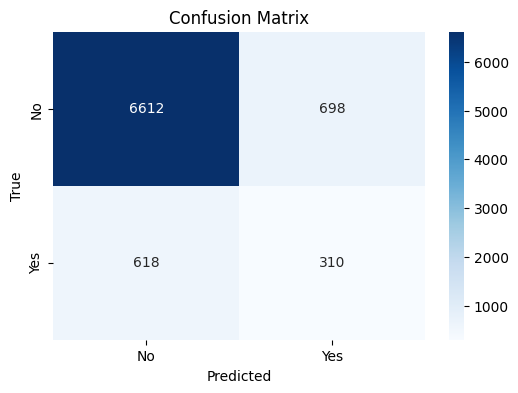

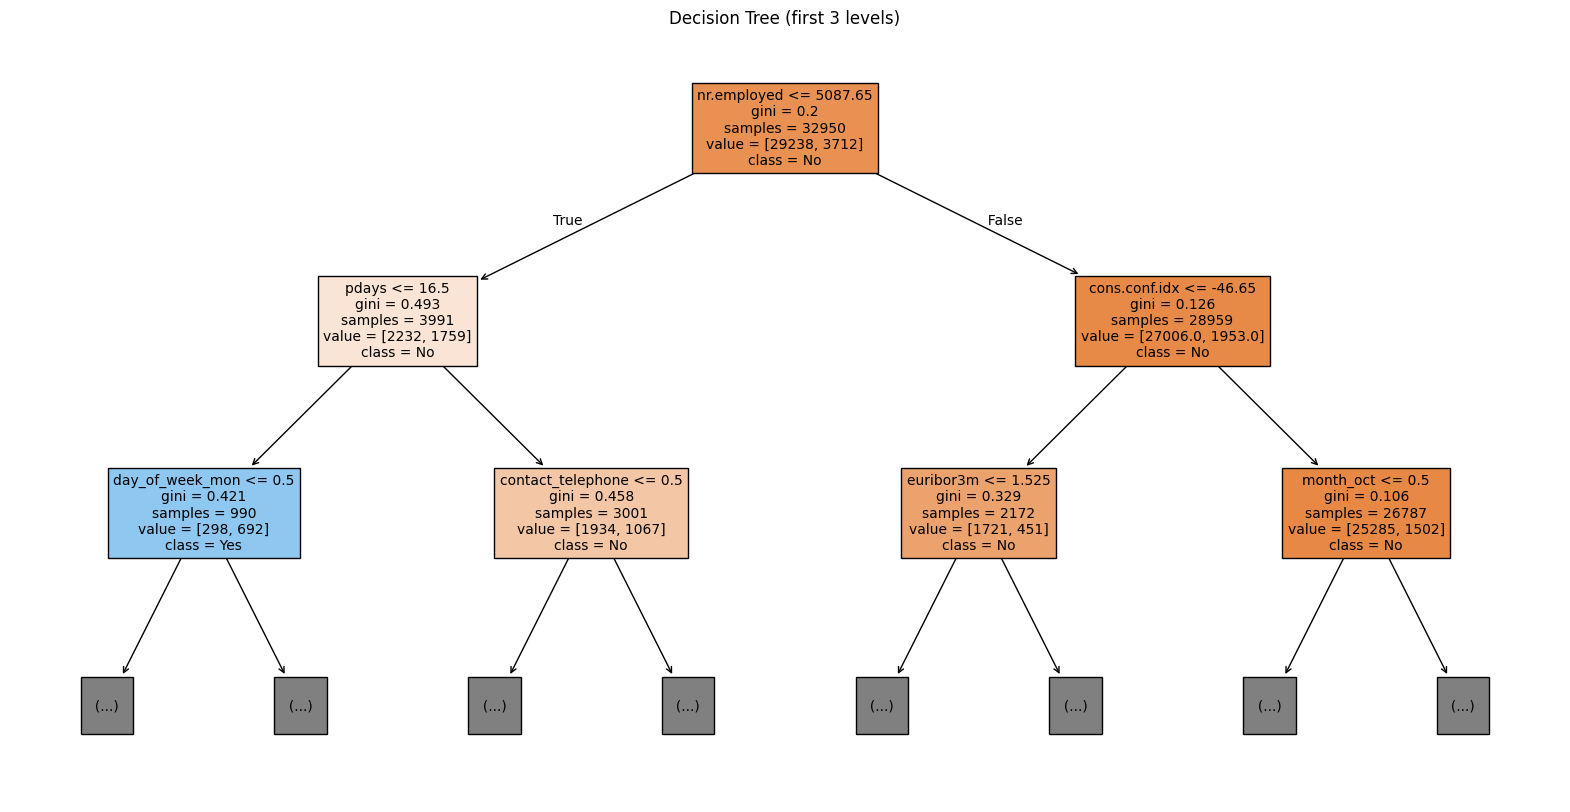

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(columns=['duration']) if 'duration' in df.columns else df
print("Dataset shape:", df.shape)

target = df['y']
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('y')
df_encoded = pd.get_dummies(df.drop(columns=['y']), columns=categorical_features, drop_first=True)
df_encoded['y'] = target.map({'yes': 1, 'no': 0})

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=2)
plt.title("Decision Tree (first 3 levels)")
plt.show()


Dataset shape: (41188, 21)
Decision Tree Classifier Accuracy: 84.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.31      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238



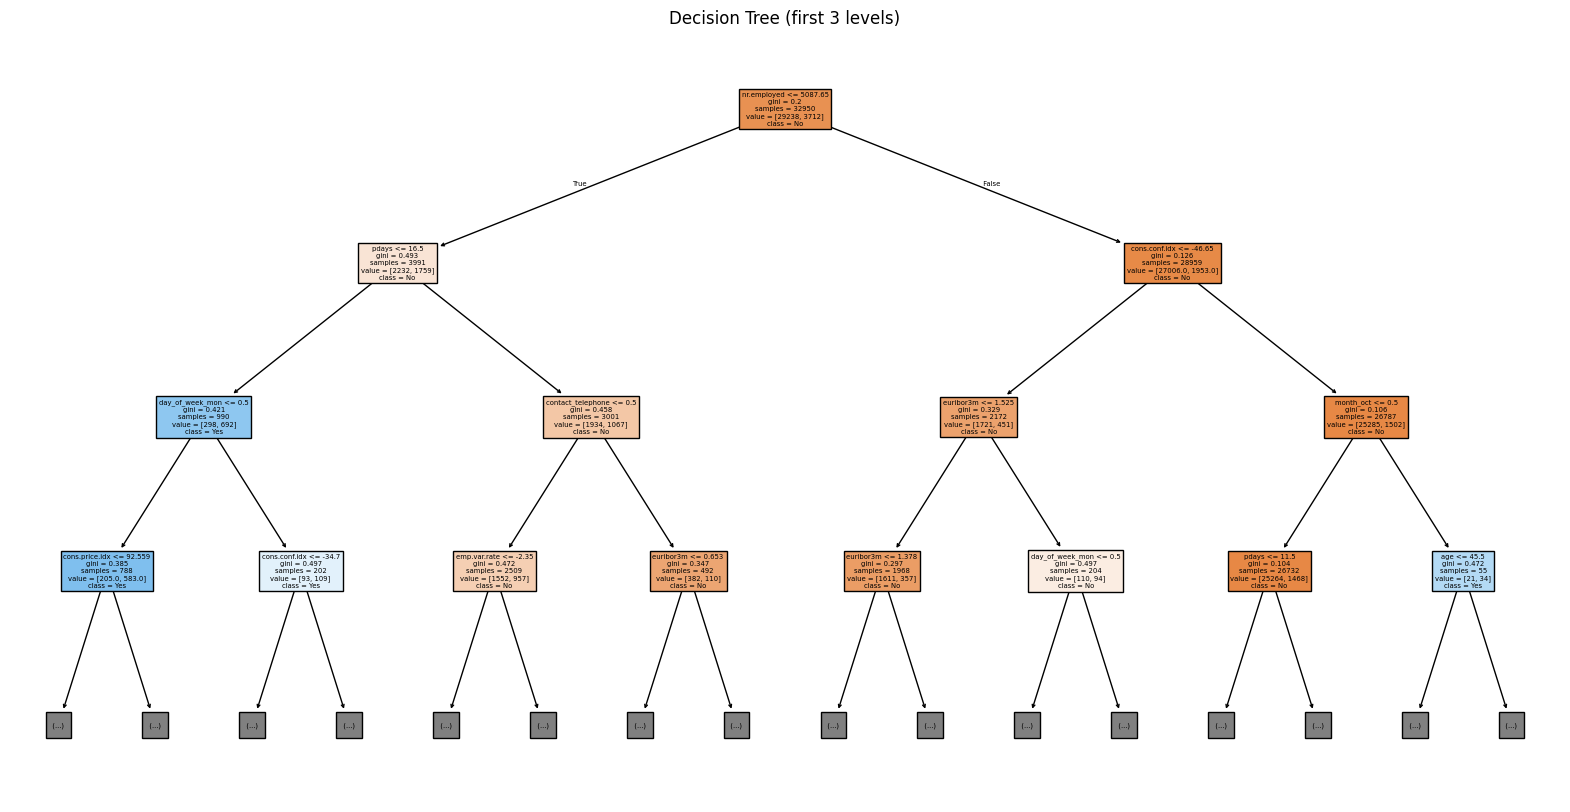

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset (make sure the CSV file is in the specified location)
df = pd.read_csv('bank-additional-full.csv', sep=';')
print("Dataset shape:", df.shape)

# Drop the 'duration' column because it gives away information about the outcome
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

# Encode categorical variables
# First, separate the target variable
target = df['y']

# One-hot encode all categorical features except the target
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('y')  # exclude target from encoding

df_encoded = pd.get_dummies(df.drop(columns=['y']), columns=categorical_features, drop_first=True)

# Encode the target variable ('yes' -> 1, 'no' -> 0)
df_encoded['y'] = target.map({'yes': 1, 'no': 0})

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)

# (Optional) Plot the decision tree for visualization
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=3)
plt.title("Decision Tree (first 3 levels)")
plt.show()


Dataset shape: (41188, 21)
Decision Tree Classifier Accuracy: 84.03%

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7310
           1       0.31      0.33      0.32       928

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238

Confusion Matrix:
[[6612  698]
 [ 618  310]]


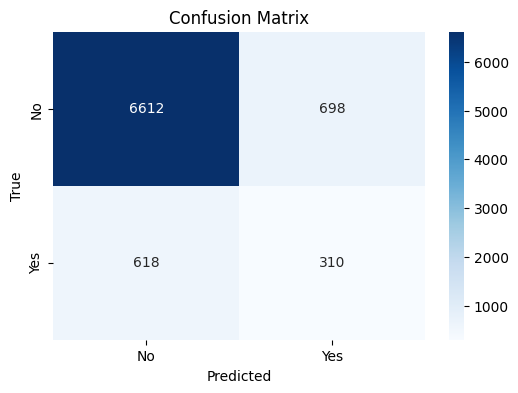

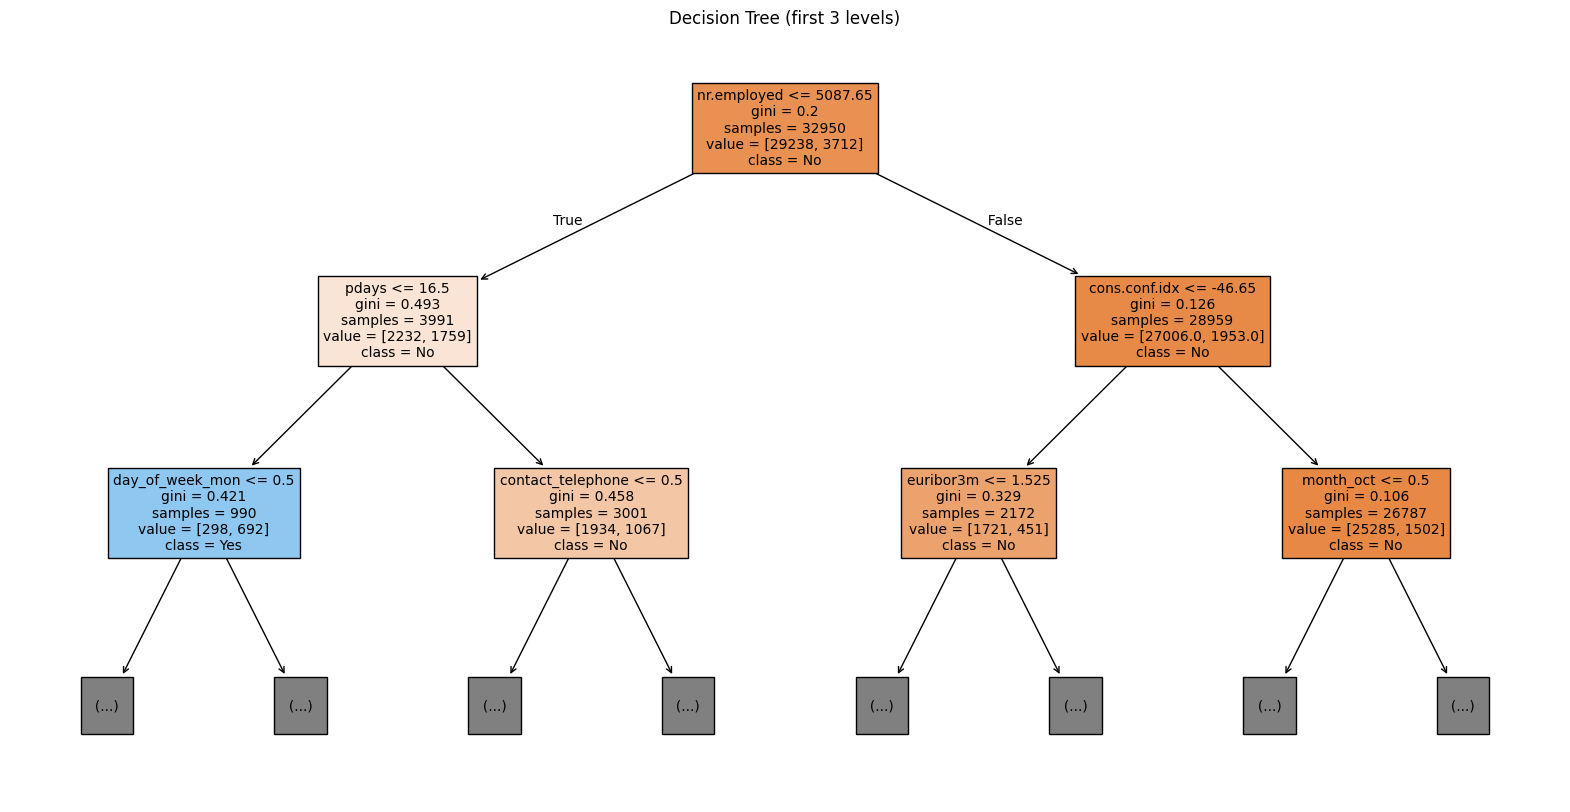

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the CSV file is in the specified location)
df = pd.read_csv('bank-additional-full.csv', sep=';')
print("Dataset shape:", df.shape)

# Drop the 'duration' column because it gives away information about the outcome
if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

# Encode categorical variables
# First, separate the target variable
target = df['y']

# One-hot encode all categorical features except the target
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('y')  # exclude target from encoding

df_encoded = pd.get_dummies(df.drop(columns=['y']), columns=categorical_features, drop_first=True)

# Encode the target variable ('yes' -> 1, 'no' -> 0)
df_encoded['y'] = target.map({'yes': 1, 'no': 0})

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", report)

# Add Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the Confusion Matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# (Optional) Plot the decision tree for visualization
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], max_depth=2)
plt.title("Decision Tree (first 3 levels)")
plt.show()
